El dataset fue obtenido de obtenido de: https://www.kaggle.com/datasets/fahadrehman07/movie-reviews-and-emotion-dataset

In [2]:
!pip install py3langid contractions


In [3]:
import string
import contractions
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import py3langid as langid
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.probability import FreqDist
import pickle
# Estilo de matplotlib
plt.style.use("ggplot")

In [4]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("names")
nltk.download("wordnet")
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to /Users/user/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/user/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /Users/user/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

## Analisis de entrada (Primario)

In [5]:
df = pd.read_csv("Movies_Reviews_modified_version1.csv", index_col=0) #index_col para indicar que no quiero dos indices

df


,Ratings,Reviews,movie_name,Resenhas,genres,Description,emotion
0,3.0,"It had some laughs, but overall the motivation...",Waiting to Exhale,"Riu algumas risadas, mas no geral a motivação ...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
1,4.0,"WAITING TO EXHALE Waiting, and waiting, and wa...",Waiting to Exhale,"ESPERANDO PARA EXALAR Esperando, e esperando, ...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
2,4.0,"Angela Basset was good as expected, but Whitne...",Waiting to Exhale,"Angela Basset foi boa como o esperado, mas Whi...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
3,5.0,"The movie is okay, mediocre might even be the ...",Waiting to Exhale,"O filme é bom, medíocre pode até ser a palavra...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
4,5.0,I got an opportunity to see Waiting To Exhale ...,Waiting to Exhale,Tive a oportunidade de ver Waiting To Exhale p...,"['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
...,...,...,...,...,...,...,...
46168,10.0,10/10 buying this the second it's out online. ...,Robin Hood,10/10 comprando este no segundo que sai online...,"['Drama', 'Action', 'Romance']",Add a Plot,anticipation
46169,4.0,"""Lady Jayne:Killer"" is a bottom of the barrel ...",Betrayal,"""Lady Jayne: Killer"" é uma parte inferior do f...","['Action', 'Drama', 'Thriller']",Felix and Misela are father and daughter and o...,sadness
46170,4.0,"""Lady Jayne:Killer"" is a bottom of the barrel ...",Betrayal,"""Lady Jayne: Killer"" é uma parte inferior do f...","['Action', 'Drama', 'Thriller']",After being ditched by long term girlfriend Ge...,sadness
46171,5.0,"As thrillers go, there are a few surprises her...",Betrayal,"Como os filmes de suspense, existem algumas su...","['Action', 'Drama', 'Thriller']",Felix and Misela are father and daughter and o...,sadness


In [6]:
df.describe()

,Ratings
count,46173.000000
mean,5.983735
std,2.893144
min,1.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,10.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46173 entries, 0 to 46172
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ratings      46173 non-null  float64
 1   Reviews      46173 non-null  object 
 2   movie_name   46173 non-null  object 
 3   Resenhas     46173 non-null  object 
 4   genres       46173 non-null  object 
 5   Description  46173 non-null  object 
 6   emotion      46173 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.8+ MB


In [8]:
df.isna().sum()

Ratings        0
Reviews        0
movie_name     0
Resenhas       0
genres         0
Description    0
emotion        0
dtype: int64

In [9]:
df.shape

(46173, 7)

In [10]:
df.size

323211

In [11]:
df.nunique() # Numero de datos unicos por cada colummna.

Ratings           10
Reviews        19316
movie_name      1583
Resenhas       19316
genres           697
Description     2060
emotion            8
dtype: int64

#### Podemos apreciar que hay 8 emociones distintas

<Axes: >

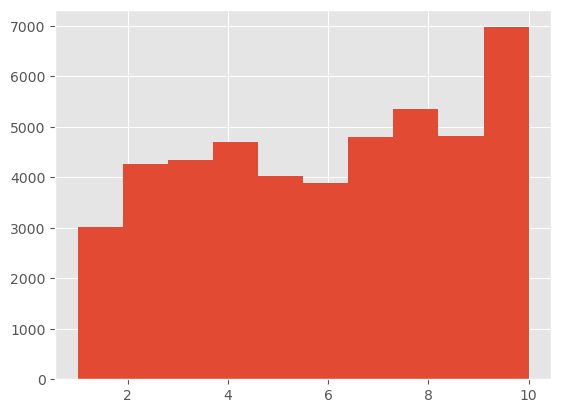

In [12]:
df["Ratings"].hist()

<Axes: xlabel='Ratings'>

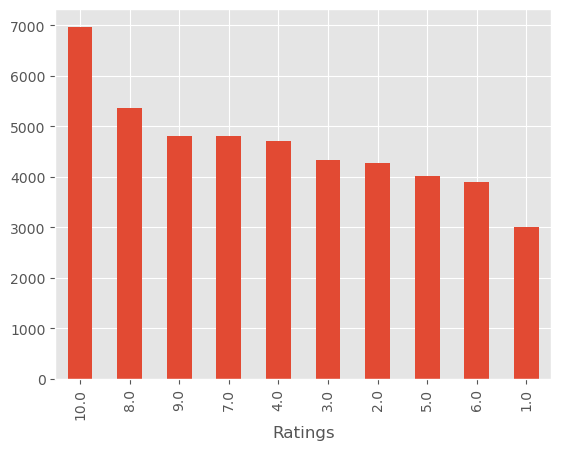

In [13]:
df["Ratings"].value_counts().plot.bar()

<Axes: xlabel='emotion'>

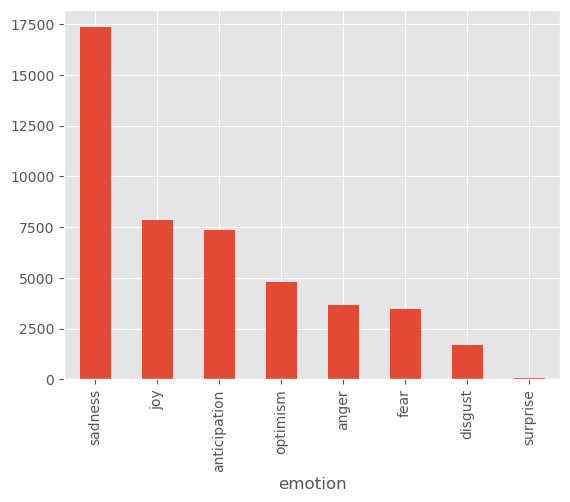

In [14]:
df["emotion"].value_counts().plot.bar()

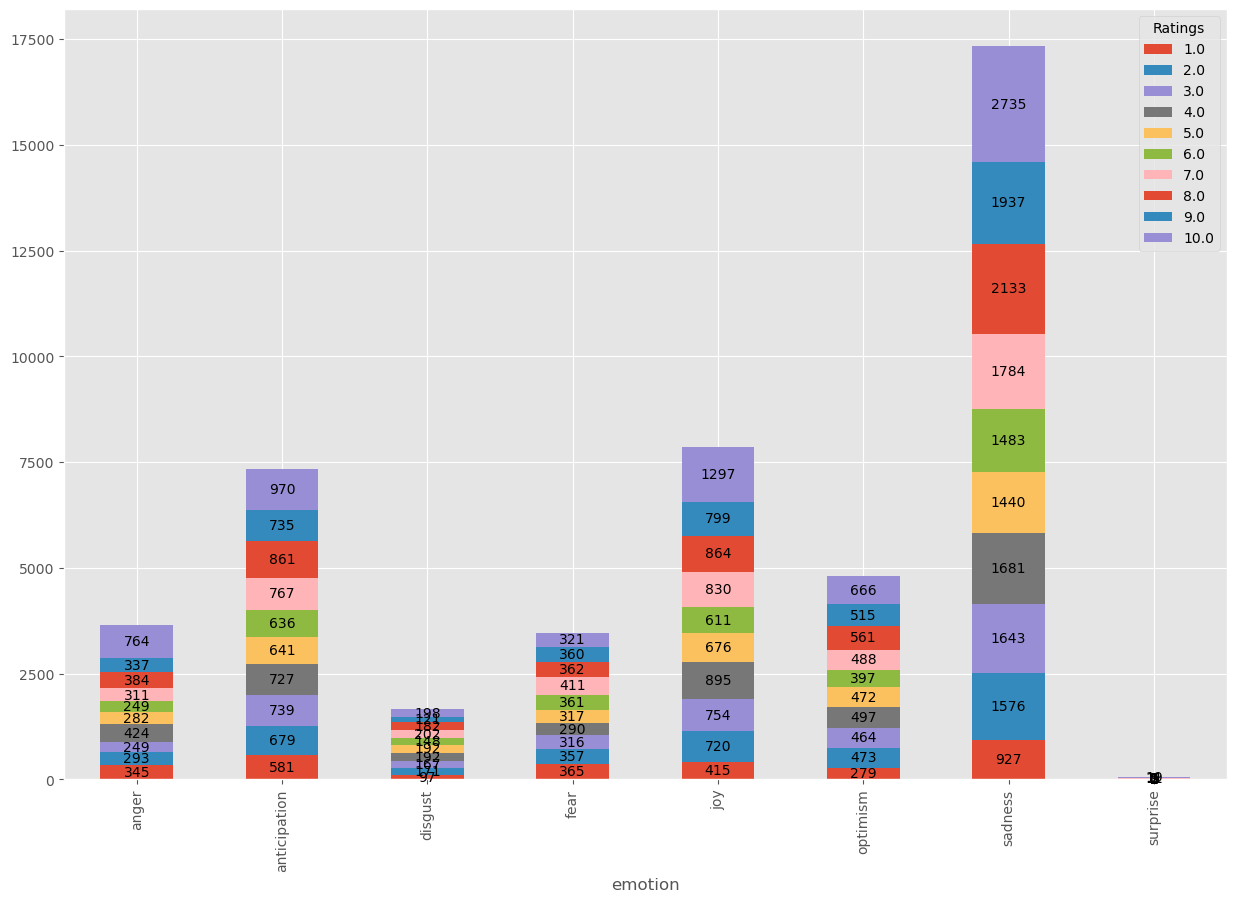

In [15]:
rating_by_emotion = df.groupby("emotion")["Ratings"].value_counts().unstack()




ax =rating_by_emotion.plot(kind="bar", stacked=True, figsize=(15, 10))

for container in ax.containers:
    ax.bar_label(container, label_type="center")


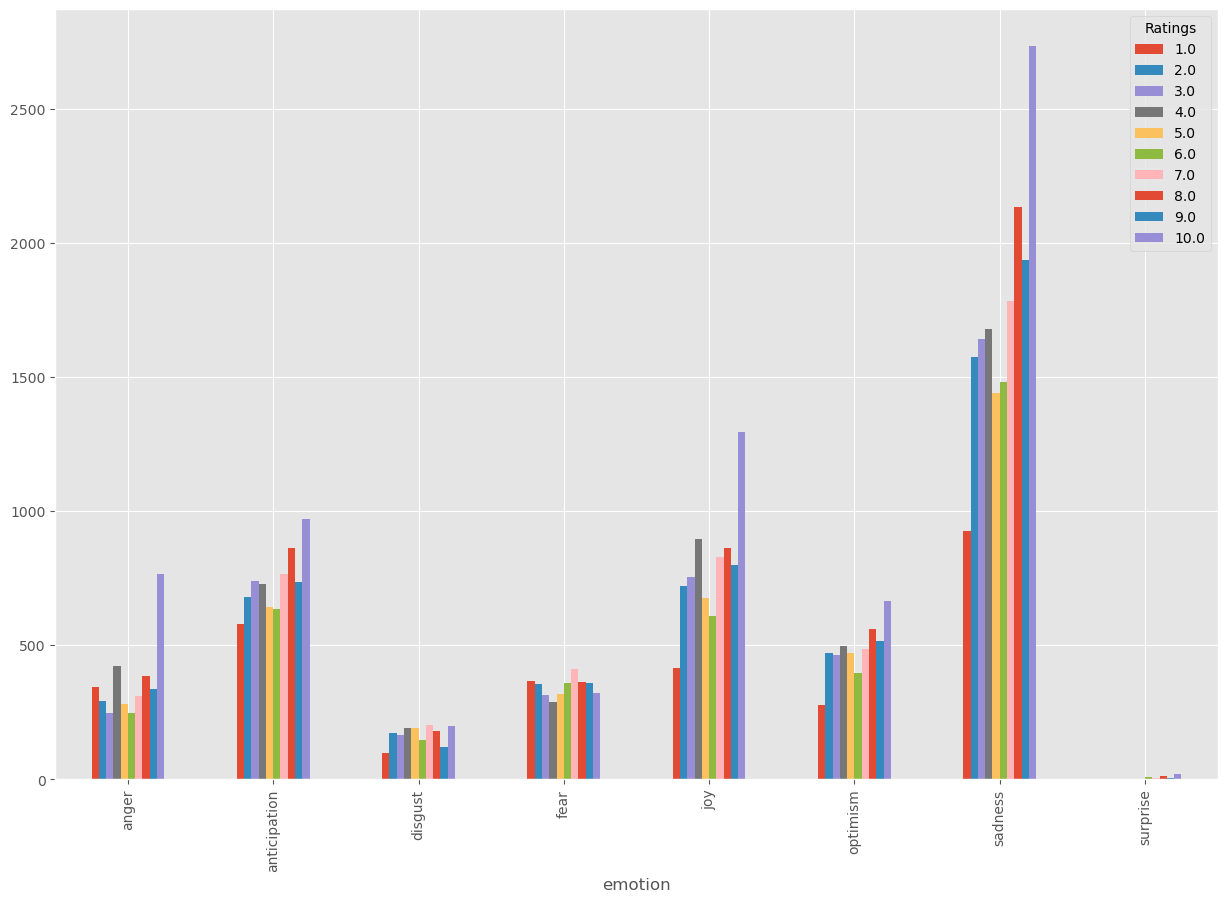

In [16]:
rating_by_emotion = df.groupby("emotion")["Ratings"].value_counts().unstack()




ax =rating_by_emotion.plot(kind="bar", stacked=False, figsize=(15, 10))


In [17]:
rating_by_emotion = df.groupby("emotion")["Ratings"].value_counts()

rating_by_emotion

emotion   Ratings
anger     10.0       764
          4.0        424
          8.0        384
          1.0        345
          9.0        337
                    ... 
surprise  7.0          5
          2.0          3
          3.0          3
          4.0          2
          5.0          1
Name: count, Length: 79, dtype: int64

### De las 8 emociones distintas que hay, observemoslas mas a detalle

In [18]:
df["emotion"].value_counts()

emotion
sadness         17339
joy              7861
anticipation     7336
optimism         4812
anger            3638
fear             3460
disgust          1670
surprise           57
Name: count, dtype: int64

#### Podemos inferir que `surprise` es una categoría atípica, tendremos que eliminarla, y aplicar undersampling sobre las demas.

#### Por el bien de los demas, también eliminare `disgust`, ya que es también menos que el resto.

In [19]:
df[df["emotion"].apply(lambda x: x != "surprise" and x != "disgust")]

,Ratings,Reviews,movie_name,Resenhas,genres,Description,emotion
0,3.0,"It had some laughs, but overall the motivation...",Waiting to Exhale,"Riu algumas risadas, mas no geral a motivação ...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
1,4.0,"WAITING TO EXHALE Waiting, and waiting, and wa...",Waiting to Exhale,"ESPERANDO PARA EXALAR Esperando, e esperando, ...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
2,4.0,"Angela Basset was good as expected, but Whitne...",Waiting to Exhale,"Angela Basset foi boa como o esperado, mas Whi...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
3,5.0,"The movie is okay, mediocre might even be the ...",Waiting to Exhale,"O filme é bom, medíocre pode até ser a palavra...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
4,5.0,I got an opportunity to see Waiting To Exhale ...,Waiting to Exhale,Tive a oportunidade de ver Waiting To Exhale p...,"['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
...,...,...,...,...,...,...,...
46168,10.0,10/10 buying this the second it's out online. ...,Robin Hood,10/10 comprando este no segundo que sai online...,"['Drama', 'Action', 'Romance']",Add a Plot,anticipation
46169,4.0,"""Lady Jayne:Killer"" is a bottom of the barrel ...",Betrayal,"""Lady Jayne: Killer"" é uma parte inferior do f...","['Action', 'Drama', 'Thriller']",Felix and Misela are father and daughter and o...,sadness
46170,4.0,"""Lady Jayne:Killer"" is a bottom of the barrel ...",Betrayal,"""Lady Jayne: Killer"" é uma parte inferior do f...","['Action', 'Drama', 'Thriller']",After being ditched by long term girlfriend Ge...,sadness
46171,5.0,"As thrillers go, there are a few surprises her...",Betrayal,"Como os filmes de suspense, existem algumas su...","['Action', 'Drama', 'Thriller']",Felix and Misela are father and daughter and o...,sadness


In [20]:
categorias = [cat for cat in df["emotion"].unique().tolist() if cat != "disgust" and cat != "surprise"]

for cat in categorias:
    print(f"La categoría {cat} tiene: { df[df['emotion'] == cat]['emotion'].count()  }")

La categoría anticipation tiene: 7336
La categoría sadness tiene: 17339
La categoría joy tiene: 7861
La categoría fear tiene: 3460
La categoría optimism tiene: 4812
La categoría anger tiene: 3638


In [21]:
def get_data_for_NLP(df):
    df_for_nlp = {}

    df_for_nlp["reviews"] = df[df["emotion"].apply(lambda x: x != "surprise" and x != "disgust")]["Reviews"]

    df_for_nlp["emotion"] = df[df["emotion"].apply(lambda x: x != "surprise" and x != "disgust")]["emotion"]
    
    return df_for_nlp

In [22]:
print(f"Cantidad de filas que ya NO se usarán: {len(df) - len(df[df['emotion'].apply(lambda x: x != 'surprise' and x != 'disgust')])}")

Cantidad de filas que ya NO se usarán: 1727


In [23]:
df_for_NLP  = pd.DataFrame(get_data_for_NLP(df)).reset_index(drop=True) # Reseteando el indice, en caso de que un metaData se haya pasado.
df_for_NLP

,reviews,emotion
0,"It had some laughs, but overall the motivation...",anticipation
1,"WAITING TO EXHALE Waiting, and waiting, and wa...",anticipation
2,"Angela Basset was good as expected, but Whitne...",anticipation
3,"The movie is okay, mediocre might even be the ...",anticipation
4,I got an opportunity to see Waiting To Exhale ...,anticipation
...,...,...
44441,10/10 buying this the second it's out online. ...,anticipation
44442,"""Lady Jayne:Killer"" is a bottom of the barrel ...",sadness
44443,"""Lady Jayne:Killer"" is a bottom of the barrel ...",sadness
44444,"As thrillers go, there are a few surprises her...",sadness


In [24]:
df_for_NLP.shape

(44446, 2)

In [25]:
df_for_NLP.describe()

,reviews,emotion
count,44446,44446
unique,18763,6
top,I was both interested and dubious in seeing th...,sadness
freq,72,17339


### UnderSampling

In [26]:
df_for_NLP.head()

,reviews,emotion
0,"It had some laughs, but overall the motivation...",anticipation
1,"WAITING TO EXHALE Waiting, and waiting, and wa...",anticipation
2,"Angela Basset was good as expected, but Whitne...",anticipation
3,"The movie is okay, mediocre might even be the ...",anticipation
4,I got an opportunity to see Waiting To Exhale ...,anticipation


In [27]:
df_for_NLP.tail()

,reviews,emotion
44441,10/10 buying this the second it's out online. ...,anticipation
44442,"""Lady Jayne:Killer"" is a bottom of the barrel ...",sadness
44443,"""Lady Jayne:Killer"" is a bottom of the barrel ...",sadness
44444,"As thrillers go, there are a few surprises her...",sadness
44445,"As thrillers go, there are a few surprises her...",sadness


In [28]:
no_dupl_df = df_for_NLP.drop_duplicates()

In [29]:
no_dupl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22733 entries, 0 to 44240
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  22733 non-null  object
 1   emotion  22733 non-null  object
dtypes: object(2)
memory usage: 532.8+ KB


In [30]:
no_dupl_df.describe()

,reviews,emotion
count,22733,22733
unique,18763,6
top,"A very romantic film, tender and full of actio...",sadness
freq,5,8696


In [31]:
no_dupl_df["emotion"].value_counts(normalize=False)

emotion
sadness         8696
joy             4162
anticipation    3824
optimism        2682
fear            1884
anger           1485
Name: count, dtype: int64

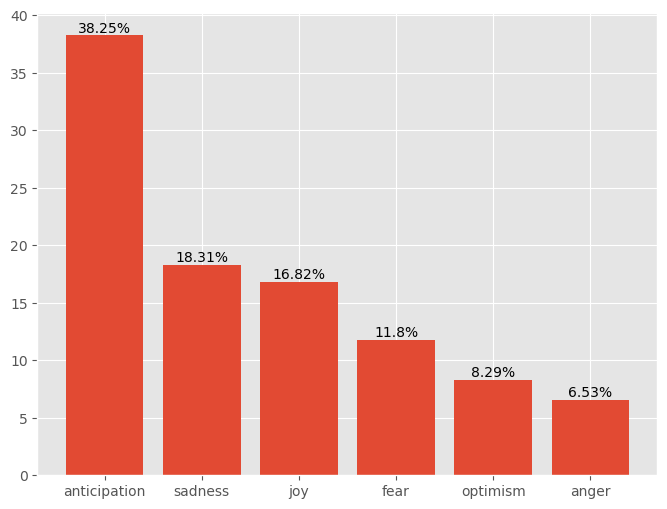

In [32]:
fig, ax =  plt.subplots(figsize=(8, 6))




barras = ax.bar(x=no_dupl_df["emotion"].unique().tolist(), height= [ pct*100 for pct in no_dupl_df["emotion"].value_counts(normalize=True)])

for barra in barras:
    width = barra.get_x() + barra.get_width()/2
    height = barra.get_height()
    ax.text(x=width, y= height, s=f"{round(height,2)}%", va="bottom", ha="center")


In [33]:
def under_sample(no_dupl_df):
    """ Toma un set de dato sin duplicados y busca en la columna target cual valor es menos frecuente, 
        luego vuelve a todos de la misma cantidad/frecuencia, para que esten balanceados y retorna un diccionario
    """
    under_sampled_df = []

    keys =no_dupl_df["emotion"].value_counts().keys().to_list()

    values  = no_dupl_df["emotion"].value_counts().values.tolist()

    #print(np.min(values))

    threshold = np.min(values)
    index = values.index(threshold) # indice del elemento minimo 
    
    
    for key in keys:
        emotion = no_dupl_df.loc[no_dupl_df["emotion"] == key]
        if len(emotion) > threshold:
            sampled = emotion.sample(threshold)
            under_sampled_df.append(sampled)

    under_sampled_df.append(no_dupl_df.loc[no_dupl_df["emotion"] == keys[index]])
    return pd.concat(under_sampled_df)

under_sampled_df = under_sample(no_dupl_df)
under_sampled_df


,reviews,emotion
33486,I had little empathy for the heroine of this s...,sadness
25379,"Whether good or bad, love or hate, movies shou...",sadness
25794,After a half hour I was looking a my watch eve...,sadness
29460,"Went to the theater, expecting to experience t...",sadness
10195,Commando is in my mind the best action film ou...,sadness
...,...,...
42897,people who made/make negative reviews knew exa...,anger
42898,If you read the books then you will love the f...,anger
43292,"Knowing nothing of BuckWild, I was left guessi...",anger
43293,"4 of 10. As slow as zombies are, this film is ...",anger


In [34]:
under_sampled_df["emotion"].unique()

array(['sadness', 'joy', 'anticipation', 'optimism', 'fear', 'anger'],
      dtype=object)

In [35]:
def under_sample(no_dupl_df):
    """ Toma un set de dato sin duplicados y busca en la columna target cual valor es menos frecuente, 
        luego vuelve a todos de la misma cantidad/frecuencia, para que esten balanceados y retorna un diccionario
    """
    under_sampled_df = []

    keys =no_dupl_df["emotion"].value_counts().keys().to_list()

    values  = no_dupl_df["emotion"].value_counts().values.tolist()

    #print(np.min(values))

    #threshold = 300
    threshold = np.min(values)
    index = values.index(threshold) # indice del elemento minimo 
    print(threshold)
    
    for key in keys:
        emotion = no_dupl_df.loc[no_dupl_df["emotion"] == key]
        if len(emotion) > threshold:
            sampled = emotion.sample(threshold)
            under_sampled_df.append(sampled)

    under_sampled_df.append(no_dupl_df.loc[no_dupl_df["emotion"] == keys[index]])
    return pd.concat(under_sampled_df)

under_sampled_df = under_sample(no_dupl_df)
under_sampled_df["emotion"].unique()


1485


array(['sadness', 'joy', 'anticipation', 'optimism', 'fear', 'anger'],
      dtype=object)

In [36]:
# Fracción de todo el dataset
(no_dupl_df.loc[no_dupl_df["emotion"] == "anticipation"])

,reviews,emotion
0,"It had some laughs, but overall the motivation...",anticipation
1,"WAITING TO EXHALE Waiting, and waiting, and wa...",anticipation
2,"Angela Basset was good as expected, but Whitne...",anticipation
3,"The movie is okay, mediocre might even be the ...",anticipation
4,I got an opportunity to see Waiting To Exhale ...,anticipation
...,...,...
44236,This is a remarkable look at what passed for r...,anticipation
44237,"Well... what can I say, the title gives it awa...",anticipation
44238,"'Nude on the Moon' is the first, and perhaps f...",anticipation
44239,I've seen hundreds of B-grade movies and have ...,anticipation


In [37]:
#print("Cantidad posible de filas para para procesar: {}".format(1485 * len(no_dupl_df["emotion"].unique().tolist())))

In [38]:
sampled_df = under_sampled_df.sample(frac=1) # Sampleados denuevo, para cambiar orden

sampled_df = sampled_df.reset_index(drop=True)
sampled_df

,reviews,emotion
0,Vicky Cristina Barcelona is among the cream of...,sadness
1,"I think are almost a revolution, you know? you...",joy
2,I've never understood why this movie wasn't mo...,optimism
3,Quite a lot of great lines carrying life's wis...,fear
4,"""Paper Towns"" is that kid in the lunchroom who...",optimism
...,...,...
8905,"The most infamous genocide in history, Adolf H...",anger
8906,"I loved it, its awesome and different.The gunf...",sadness
8907,"Poised to be an instant classic, almost everyt...",optimism
8908,"This was a terrific movie, plain and simple. I...",anticipation


In [39]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910 entries, 0 to 8909
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  8910 non-null   object
 1   emotion  8910 non-null   object
dtypes: object(2)
memory usage: 139.3+ KB


In [40]:
sampled_df.describe()

,reviews,emotion
count,8910,8910
unique,8062,6
top,This is a very surprising movie. It is surpris...,sadness
freq,5,1485


In [41]:
sampled_df.isna().sum()

reviews    0
emotion    0
dtype: int64

In [42]:
sampled_df["emotion"].value_counts(normalize=False)

emotion
sadness         1485
joy             1485
optimism        1485
fear            1485
anticipation    1485
anger           1485
Name: count, dtype: int64

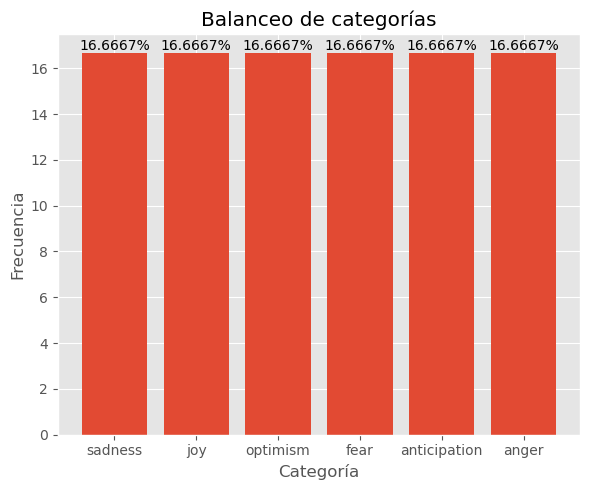

In [43]:
fig, ax = plt.subplots(figsize=(6,5))


barras = ax.bar(x=sampled_df["emotion"].unique().tolist(), height=[pct*100 for pct in sampled_df["emotion"].value_counts(normalize=True).tolist()])

for barra in barras:
    width =barra.get_x() + barra.get_width()/2
    height = barra.get_height()

    ax.text(x=width, y=height, s=f"{round(height, 4)}%", va="bottom", ha="center")

ax.set(
    title="Balanceo de categorías",
    xlabel="Categoría",
    ylabel="Frecuencia"
)

plt.tight_layout()
plt.show()

In [44]:
print("El review de menos longitud es de: {}".format(np.min(sampled_df['reviews'].apply(lambda x: len(x)))))

El review de menos longitud es de: 50


<Axes: >

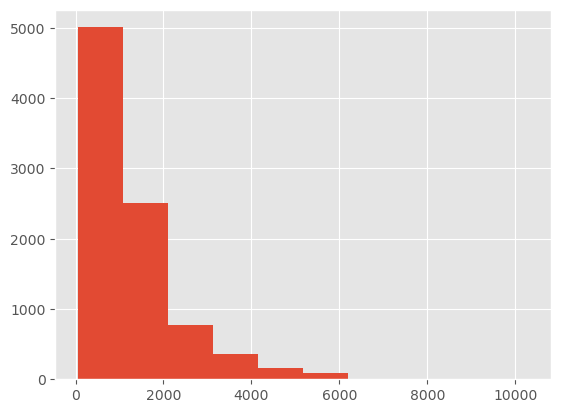

In [45]:
sampled_df["reviews"].apply(lambda x: len(x)).hist()

### Viendo el Idioma

In [46]:
# Trae todas las filas cuyo review sea en ingles, -- SEGÚN langid
sampled_df = sampled_df.loc[sampled_df["reviews"].apply(lambda x: langid.classify(x)[0] == 'en')].reset_index(drop=True)
sampled_df

,reviews,emotion
0,Vicky Cristina Barcelona is among the cream of...,sadness
1,"I think are almost a revolution, you know? you...",joy
2,I've never understood why this movie wasn't mo...,optimism
3,Quite a lot of great lines carrying life's wis...,fear
4,"""Paper Towns"" is that kid in the lunchroom who...",optimism
...,...,...
8903,"The most infamous genocide in history, Adolf H...",anger
8904,"I loved it, its awesome and different.The gunf...",sadness
8905,"Poised to be an instant classic, almost everyt...",optimism
8906,"This was a terrific movie, plain and simple. I...",anticipation


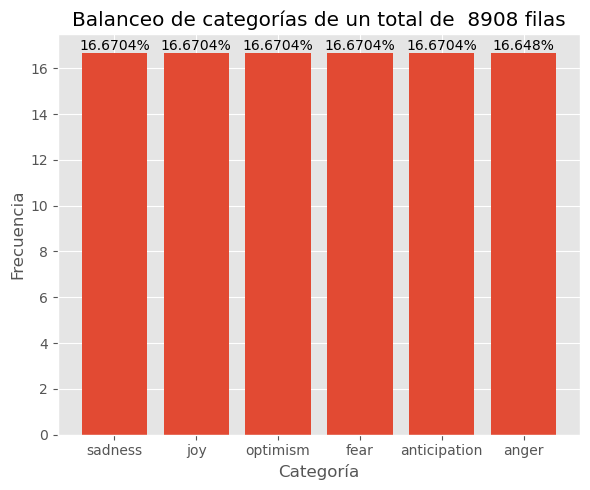

In [47]:
fig, ax = plt.subplots(figsize=(6,5))


barras = ax.bar(x=sampled_df["emotion"].unique().tolist(), height=[pct*100 for pct in sampled_df["emotion"].value_counts(normalize=True).tolist()])

for barra in barras:
    width =barra.get_x() + barra.get_width()/2
    height = barra.get_height()

    ax.text(x=width, y=height, s=f"{round(height, 4)}%", va="bottom", ha="center")

ax.set(
    title=f"Balanceo de categorías de un total de  {len(sampled_df['emotion'])} filas",
    xlabel="Categoría",
    ylabel="Frecuencia"
)

plt.tight_layout()
plt.show()

In [48]:
# Probando fix, del modulo contractions
contractions.fix("Here we go again, I told you to stop, didn't I?")

'Here we go again, I told you to stop, did not I?'

In [49]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [50]:
pos_tag(["Hola mundo", "Hey"])

[('Hola mundo', 'NNP'), ('Hey', 'NNP')]

In [51]:
pos_tag(["Hola mundo", "Hey"])[0][1][:2]

'NN'

In [52]:
import re
def clean_text(text):
    # Eliminar tokens con más de 3 caracteres que son iguales
    cleaned_text = re.sub(r'(.)\1{2,}', '', text)  # elimina cadenas repetidas de 3 o más caracteres
    return cleaned_text

In [53]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [54]:

def tokenize(oracion, metodo):
    """
    Toma una oración, expande contracciones, tokeniza y limpia los tokens.
    
    Args:
        oracion (str): La oración a procesar.
        metodo (str): El método de procesamiento a aplicar ("stemming" o "lemmatization").

    Returns:
        list: Una lista de tokens limpios procesados.
    """

    oracion = contractions.fix(oracion)
    
    tokens =  word_tokenize(oracion)
    stopwords = nltk.corpus.stopwords.words("english")
    names =  nltk.corpus.names.words()
    
    cleaned_tokens = []
    
    for token in tokens:
        if token in names: continue
    
        token = token.lower()
    
        if token in stopwords: continue
        if token in string.punctuation: continue
        if not token.isalnum(): continue
        cleaned_tokens.append(clean_text(token))
    

    
    #Filtrando por tag de palabras
    cleaned_tokens = [token for token, cat in pos_tag(cleaned_tokens) if cat[:2] in  ["NN", "VB", "RB", "JJ"]]
    if metodo == "stemming":
        #stemming
        cleaned_tokens = [stemmer.stem(token) for token in cleaned_tokens]
    
    elif metodo == "lemmatization":
        cleaned_tokens = [lemmatizer.lemmatize(token) for token in cleaned_tokens]
    else:
        cleaned_tokens = [lemmatizer.lemmatize(token) for token in cleaned_tokens]
    
    return cleaned_tokens

In [55]:
tokenize("The 44 machine learning model analyzes large datasets and makes predictions based on patterns it finds.", "lemmatization")

['machine',
 'learning',
 'model',
 'analyzes',
 'large',
 'datasets',
 'make',
 'prediction',
 'based',
 'pattern',
 'find']

In [56]:
####  Probaremos sin numeros a ver que tal nos va.

In [57]:
sampled_df["tokens"] = sampled_df["reviews"].apply(lambda x: tokenize(x, "lemmatization"))

In [58]:
sampled_df["tokens"]

0       [barcelona, cream, crop, midst, manhattan, sis...
1       [think, almost, revolution, know, comedy, movi...
2       [never, understood, movie, popular, get, great...
3       [quite, lot, great, line, carrying, life, wisd...
4       [paper, town, kid, lunchroom, act, different, ...
                              ...                        
8903    [infamous, genocide, history, hitler, murder, ...
8904    [loved, awesome, gunfight, scene, well, shot, ...
8905    [poised, instant, classic, almost, everything,...
8906    [terrific, movie, plain, simple, kept, thinkin...
8907    [meenakshi, real, portrays, gal, dilemma, purs...
Name: tokens, Length: 8908, dtype: object

In [59]:
sampled_df["emotion"].unique().tolist()

['sadness', 'joy', 'optimism', 'fear', 'anticipation', 'anger']

In [60]:
# Crear un diccionario de vocabulario
vocabulario = {"Full": []}

# Iterar sobre las filas de 'sampled_df'
for _, row in sampled_df[["tokens", "emotion"]].iterrows():
    # Agregar los tokens al vocabulario global 'Full'
    vocabulario["Full"] += row["tokens"]

    # Asegurar que cada emoción tenga su propio vocabulario en el diccionario
    emotion = row["emotion"]
    if emotion not in vocabulario:
        vocabulario[emotion] = []

    # Agregar los tokens a la emoción correspondiente
    vocabulario[emotion] += row["tokens"]


In [61]:
vocabulario

{'Full': ['barcelona',
  'cream',
  'crop',
  'midst',
  'manhattan',
  'sister',
  'match',
  'point',
  'even',
  'wiser',
  'film',
  'done',
  'film',
  'career',
  'seek',
  'answer',
  'life',
  'question',
  'number',
  'way',
  'later',
  'film',
  'contradict',
  'philosophical',
  'implication',
  'previous',
  'one',
  'reaffirm',
  'foremost',
  'theme',
  'always',
  'complication',
  'love',
  'sex',
  'ultimately',
  'film',
  'suppose',
  'considered',
  'romantic',
  'seriocomedy',
  'magnum',
  'sexual',
  'romantic',
  'played',
  'johansson',
  'go',
  'barcelona',
  'summer',
  'settling',
  'distant',
  'relative',
  'clarkson',
  'husband',
  'narrator',
  'present',
  'film',
  'particular',
  'like',
  'never',
  'used',
  'illustrates',
  'friend',
  'conservative',
  'attitude',
  'commitment',
  'engaged',
  'dependable',
  'less',
  'passionate',
  'yuppie',
  'barcelona',
  'getting',
  'master',
  'deeply',
  'stirred',
  'spanish',
  'guitar',
  'contras

In [62]:
FreqDist(vocabulario["Full"]).most_common()

[('movie', 22881),
 ('film', 16540),
 ('good', 6505),
 ('character', 6222),
 ('time', 5567),
 ('story', 5548),
 ('really', 5059),
 ('see', 4502),
 ('make', 4501),
 ('get', 4453),
 ('even', 4149),
 ('much', 4018),
 ('great', 3950),
 ('well', 3890),
 ('scene', 3847),
 ('also', 3354),
 ('people', 3255),
 ('way', 3179),
 ('bad', 3102),
 ('first', 3051),
 ('love', 2976),
 ('think', 2960),
 ('thing', 2927),
 ('watch', 2908),
 ('go', 2863),
 ('comedy', 2612),
 ('actor', 2566),
 ('made', 2548),
 ('know', 2514),
 ('plot', 2505),
 ('many', 2501),
 ('acting', 2493),
 ('life', 2462),
 ('best', 2458),
 ('say', 2445),
 ('funny', 2424),
 ('better', 2377),
 ('little', 2328),
 ('lot', 2241),
 ('end', 2226),
 ('look', 2207),
 ('year', 2205),
 ('take', 2160),
 ('never', 2152),
 ('seen', 2151),
 ('come', 2122),
 ('work', 2117),
 ('give', 2105),
 ('show', 2076),
 ('role', 2043),
 ('performance', 2033),
 ('going', 2032),
 ('something', 2002),
 ('want', 1966),
 ('still', 1966),
 ('action', 1890),
 ('part', 1

In [63]:
valores =[]

for key, value in vocabulario.items():
    print(key, len(value))
    valores.append(len(value))

#print(np.sum(valores))

Full 921689
sadness 155816
joy 157432
optimism 155534
fear 153487
anticipation 150103
anger 149317


In [64]:
np.sum(valores[1:])

921689

In [65]:
from nltk import FreqDist

# Assuming 'vocabulario' is a dictionary with emotions as keys and token lists as values
categoria_for_common = sampled_df["emotion"].unique().tolist()

most_common_frec_sets = []

# El 20 porciento de el promedio de la longitud de tokens por conjunto
n_tokens_to_keep = round(0.25 * len(vocabulario["Full"]) / len(list(vocabulario.keys())[1:]))

for cat in categoria_for_common:
    # Getting the most common 5000 tokens for each category (emotion)
    cat_most_common = set(token for token, frequency in FreqDist(vocabulario[cat]).most_common(n_tokens_to_keep))
    most_common_frec_sets.append(cat_most_common)

In [66]:
# Supongamos que 'most_common_frec_sets' contiene todos los conjuntos a comparar.
duplicados = False  # Indicador para saber si hay duplicados

for i in range(len(most_common_frec_sets)):
    for j in range(i + 1, len(most_common_frec_sets)):
        if most_common_frec_sets[i] == most_common_frec_sets[j]:
            print(f"Los conjuntos en las posiciones {i} y {j} son iguales.")
            duplicados = True

if not duplicados:
    print("No hay conjuntos duplicados.")


No hay conjuntos duplicados.


In [67]:
most_common_tokens = set().union(*most_common_frec_sets)

In [68]:
n_tokens_to_keep

38404

In [69]:
print("La cantidad de Tokens unicos es: {} y estan guardados enla variable `most_common_tokens`".format(len(most_common_tokens)))

La cantidad de Tokens unicos es: 33672 y estan guardados enla variable `most_common_tokens`


In [163]:
with open("modelo/most_common_tokens.pkl", "wb") as f:
    pickle.dump(most_common_tokens, f)

In [71]:
#most_common_frec_sets

In [72]:

def tokenize_for_train(oracion, metodo, most_common_frec_sets):
    """
        Toma una oración, expande contracciones, tokeniza y limpia los tokens.
            
        Args:
            oracion (str): La oración a procesar.
            metodo (str): El método de procesamiento a aplicar ("stemming" o "lemmatization").
            most_common_tokens (set): Un conjunto de tokens comunes para filtrar los resultados.
        
        Returns:
            list: Una lista de tokens limpios procesados.
    """
    oracion = contractions.fix(oracion)
    
    tokens =  word_tokenize(oracion)
    stopwords = nltk.corpus.stopwords.words("english")
    names =  nltk.corpus.names.words()
    
    cleaned_tokens = []
    
    for token in tokens:
        if token in names: continue
    
        token = token.lower()
    
        if token in stopwords: continue
        if token in string.punctuation: continue
        if not token.isalnum(): continue
        cleaned_tokens.append(clean_text(token)) # Limpiando el token, porque no queremos cadena de caracteres repetidos.
    

    
    #Filtrando por tag de palabras
    cleaned_tokens = [token for token, cat in pos_tag(cleaned_tokens) if cat[:2] in  ["NN", "VB", "RB", "JJ", "DC"]]
    if metodo == "stemming":
        #stemming
        cleaned_tokens = [stemmer.stem(token) for token in cleaned_tokens]
    
    elif metodo == "lemmatization":
        cleaned_tokens = [lemmatizer.lemmatize(token) for token in cleaned_tokens]
    else:
        cleaned_tokens = [lemmatizer.lemmatize(token) for token in cleaned_tokens]
    

    # Solamente se tomaran en  cuenta los tokens limpios
    cleaned_tokens = [token  for token in cleaned_tokens if token in most_common_frec_sets]
    
    return " ".join(cleaned_tokens)


In [73]:
sampled_df["training_tokens_lemma"] =  sampled_df["reviews"].apply(lambda x: tokenize_for_train(x, "lemmatization", most_common_tokens))

In [74]:
sampled_df["training_tokens_stemm"] =  sampled_df["reviews"].apply(lambda x: tokenize_for_train(x, "stemming", most_common_tokens))

In [75]:
lemma_sampled_df = sampled_df["training_tokens_lemma"]
stemm_sampled_df =  sampled_df["training_tokens_stemm"]

In [76]:
lemma_sampled_df 

0       barcelona cream crop midst manhattan sister ma...
1       think almost revolution know comedy movie ridi...
2       never understood movie popular get great actin...
3       quite lot great line carrying life wisdom refl...
4       paper town kid lunchroom act different seems c...
                              ...                        
8903    infamous genocide history hitler murder jew wo...
8904    loved awesome gunfight scene well shot put tog...
8905    poised instant classic almost everything film ...
8906    terrific movie plain simple kept thinking gues...
8907    meenakshi real portrays gal dilemma pursuing i...
Name: training_tokens_lemma, Length: 8908, dtype: object

In [77]:
stemm_sampled_df 

0       barcelona cream crop midst manhattan sister ma...
1       think almost know movi kind movi realist see t...
2       never understood movi popular get great act ha...
3       quit lot great line life wisdom reflect insigh...
4       paper town kid lunchroom act differ seem cool ...
                              ...                        
8903    hitler murder jew world war ii first take plac...
8904    love gunfight scene well shot put camera work ...
8905                  instant classic almost film act etc
8906    movi plain kept think guess go end hole close ...
8907    meenakshi real portray gal dilemma inner life ...
Name: training_tokens_stemm, Length: 8908, dtype: object

In [78]:
# Importando los vectorizadores
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#### Binary Term Frequency

In [79]:
binary_term_frec= CountVectorizer(binary=True)

# Aqui apreciamos el binary term frequency
binary_term_frec.fit(lemma_sampled_df)


lemma_binary_term_frec_input = pd.DataFrame(binary_term_frec.transform(lemma_sampled_df).toarray(), columns=binary_term_frec.get_feature_names_out())

In [80]:
binary_term_frec= CountVectorizer(binary=True)

# Aqui apreciamos el binary term frequency
binary_term_frec.fit(stemm_sampled_df)

stemm_binary_term_frec_input = pd.DataFrame(binary_term_frec.transform(stemm_sampled_df).toarray(), columns=binary_term_frec.get_feature_names_out())

In [81]:
"""with open("modelo/lemma_binary_term_frec.pickle", mode="wb") as f:
    pickle.dump(lemma_binary_term_frec_input, f)

with open("modelo/stemm_binary_term_frec.pickle", mode="wb") as f:
    pickle.dump(stemm_binary_term_frec_input, f)"""

'with open("modelo/lemma_binary_term_frec.pickle", mode="wb") as f:\n    pickle.dump(lemma_binary_term_frec_input, f)\n\nwith open("modelo/stemm_binary_term_frec.pickle", mode="wb") as f:\n    pickle.dump(stemm_binary_term_frec_input, f)'

#### Bag of words

In [82]:
bag_of_words = CountVectorizer()

bag_of_words.fit(lemma_sampled_df)
# Aqui apreciamos el bag of words
lemma_bag_of_words_input = pd.DataFrame(bag_of_words.transform(lemma_sampled_df).toarray(), columns=bag_of_words.get_feature_names_out())

In [83]:
bag_of_words = CountVectorizer()

bag_of_words.fit(stemm_sampled_df)
# Aqui apreciamos el bag of words
stemm_bag_of_words_input = pd.DataFrame(bag_of_words.transform(stemm_sampled_df).toarray(), columns=bag_of_words.get_feature_names_out())

In [84]:
"""with open("modelo/lemma_bag_of_words", mode="wb") as f:
    pickle.dump(lemma_bag_of_words_input, f)

with open("modelo/stemm_bag_of_words", mode="wb") as f:
    pickle.dump(stemm_bag_of_words_input, f)"""

'with open("modelo/lemma_bag_of_words", mode="wb") as f:\n    pickle.dump(lemma_bag_of_words_input, f)\n\nwith open("modelo/stemm_bag_of_words", mode="wb") as f:\n    pickle.dump(stemm_bag_of_words_input, f)'

In [85]:
#dir(tfidf_vectorizer)

#### TDF IDF

In [86]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(lemma_sampled_df)
# Aqui apreciamos el tfidf
lemma_tfidf_input = pd.DataFrame(tfidf_vectorizer.transform(lemma_sampled_df).toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [87]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(lemma_sampled_df)
# Aqui apreciamos el tfidf
stemm_tfidf_input = pd.DataFrame(tfidf_vectorizer.transform(stemm_sampled_df).toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [88]:
"""with open("modelo/lemma_tfidf.pickle", mode="wb") as f:
    pickle.dump(lemma_binary_term_frec_input, f)

with open("modelo/stemm_tfidf.pickle", mode="wb") as f:
    pickle.dump(stemm_tfidf_input, f)"""

'with open("modelo/lemma_tfidf.pickle", mode="wb") as f:\n    pickle.dump(lemma_binary_term_frec_input, f)\n\nwith open("modelo/stemm_tfidf.pickle", mode="wb") as f:\n    pickle.dump(stemm_tfidf_input, f)'

### Parte corresponiente a `Machine Learning`


In [89]:
# Pipeline de modelos
vectorizadores = [[lemma_bag_of_words_input, stemm_bag_of_words_input], [lemma_binary_term_frec_input, stemm_binary_term_frec_input], [lemma_tfidf_input, stemm_tfidf_input]]

for vectorizador in vectorizadores:
    for tipo in vectorizador:
        tipo["emotion"] = sampled_df["emotion"]

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
# Total  de 6  Clasificadores.


# Separar la data


In [91]:
vectorizadores[0][0]

,100th,10mins,10th,1300s,14th,15th,16th,17th,18th,18wheelers,...,zwart,zweibel,zwick,ànd,ænigma,éclat,élan,époque,époux,сrowd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
#  PRUEBA

# Seleccionar el primer DataFrame en la lista vectorizadores
trial = vectorizadores[0][0]

# Eliminar la columna 'emotion' de 'trial' para obtener X
X = trial.drop(columns=["emotion"])

# Asignar la columna 'emotion' a y
y = trial["emotion"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
clf.score(X_test, y_test)

0.31032547699214363

In [94]:
#results = train_get_results(vectorizadores[0][0], seed=42)

$ 2 \, (\text{lemmatization, stemming}) \times 3 \, (\text{TF-IDF, binary term frequency, bag of words}) = 6 \, \text{combinations per model}$

In [95]:
import time
def train_get_results(dataframe, seed):
    """
        Toma un dataframe con sus features y target, los divide (80/20), instancia 6 modelos,
        para tres tipos de clasificadores diferentes y retorna las predicciones.
    """

    # Eliminar la columna 'emotion' de 'trial' para obtener X
    X = dataframe.drop(columns=["emotion"]).to_numpy()

    # Asignar la columna 'emotion' a y
    y = dataframe["emotion"].to_numpy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

    
    models = {
        "KNeighborsClassifier": KNeighborsClassifier(),
        "RandomForestClassifier": RandomForestClassifier(),
        "AdaBoostClassifier": AdaBoostClassifier(),
        "DecisionTree": tree.DecisionTreeClassifier(),
        "GaussianNB": GaussianNB(),
        "MultinomialNB": MultinomialNB()
    }
    
    results = {}

   
    
    for model_name, model in models.items():
        # tomar el tiempo
        start_time = time.time()
        
        model.fit(X_train, y_train)

        # detener el cronometro
        end_time = time.time()

        training_time = end_time - start_time  # Tiempo de entrenamiento

        # tiempo de inferencia
        inf_start_time  = time.time()
        y_preds =  model.predict(X_test)
        inf_end_time  = time.time()

        inf_time = inf_end_time  - inf_start_time
        
        accuracy = accuracy_score(y_test, y_preds)
        recall = recall_score(y_test, y_preds, average='weighted')
        f1 = f1_score(y_test, y_preds, average='weighted')
        cm = confusion_matrix(y_test, y_preds)
        
        results[model_name] = [accuracy, recall, f1, training_time, inf_time, cm]

    return results

In [96]:
classifiers = ["KNeighborsClassifier", "RandomForestClassifier", "AdaBoostClassifier", "DecisionTree", "GaussianNB", "MultinomialNB"]
vectorizadores_ = [["lemmaBOW", "stemmBOW"], ["lemmaBinaryTF", "stemmBinaryTF"], ["lemmaTFIDF", "stemmTFIDF"]]

# Crear las combinaciones usando bucles anidados
combinaciones1 = []
for vectorizado_pack_ in vectorizadores_:
    for vectorizado in vectorizado_pack_:
        for classifier in  classifiers:
            combinaciones1.append(f"{classifier}_{vectorizado}")

## Verificando informacion, para saber si la tabla de benchmark esta bn
for combinacion in combinaciones1:
    print(combinacion)

KNeighborsClassifier_lemmaBOW
RandomForestClassifier_lemmaBOW
AdaBoostClassifier_lemmaBOW
DecisionTree_lemmaBOW
GaussianNB_lemmaBOW
MultinomialNB_lemmaBOW
KNeighborsClassifier_stemmBOW
RandomForestClassifier_stemmBOW
AdaBoostClassifier_stemmBOW
DecisionTree_stemmBOW
GaussianNB_stemmBOW
MultinomialNB_stemmBOW
KNeighborsClassifier_lemmaBinaryTF
RandomForestClassifier_lemmaBinaryTF
AdaBoostClassifier_lemmaBinaryTF
DecisionTree_lemmaBinaryTF
GaussianNB_lemmaBinaryTF
MultinomialNB_lemmaBinaryTF
KNeighborsClassifier_stemmBinaryTF
RandomForestClassifier_stemmBinaryTF
AdaBoostClassifier_stemmBinaryTF
DecisionTree_stemmBinaryTF
GaussianNB_stemmBinaryTF
MultinomialNB_stemmBinaryTF
KNeighborsClassifier_lemmaTFIDF
RandomForestClassifier_lemmaTFIDF
AdaBoostClassifier_lemmaTFIDF
DecisionTree_lemmaTFIDF
GaussianNB_lemmaTFIDF
MultinomialNB_lemmaTFIDF
KNeighborsClassifier_stemmTFIDF
RandomForestClassifier_stemmTFIDF
AdaBoostClassifier_stemmTFIDF
DecisionTree_stemmTFIDF
GaussianNB_stemmTFIDF
Multinomial

In [97]:
results_df = pd.DataFrame(index=combinaciones1, columns=["accuracy", "recall", "f1_score", "tiempo de entrenamiento (s)", "tiempo de inferencia (s)"])

In [98]:
results_df

,accuracy,recall,f1_score,tiempo de entrenamiento (s),tiempo de inferencia (s)
KNeighborsClassifier_lemmaBOW,NaN,NaN,NaN,NaN,NaN
RandomForestClassifier_lemmaBOW,NaN,NaN,NaN,NaN,NaN
AdaBoostClassifier_lemmaBOW,NaN,NaN,NaN,NaN,NaN
DecisionTree_lemmaBOW,NaN,NaN,NaN,NaN,NaN
GaussianNB_lemmaBOW,NaN,NaN,NaN,NaN,NaN
MultinomialNB_lemmaBOW,NaN,NaN,NaN,NaN,NaN
KNeighborsClassifier_stemmBOW,NaN,NaN,NaN,NaN,NaN
RandomForestClassifier_stemmBOW,NaN,NaN,NaN,NaN,NaN
AdaBoostClassifier_stemmBOW,NaN,NaN,NaN,NaN,NaN
DecisionTree_stemmBOW,NaN,NaN,NaN,NaN,NaN


In [100]:
results = train_get_results(vectorizadores[0][0], seed=42)

In [101]:
classifiers

['KNeighborsClassifier',
 'RandomForestClassifier',
 'AdaBoostClassifier',
 'DecisionTree',
 'GaussianNB',
 'MultinomialNB']

In [103]:
empty_df = []
for vectorizado_pack in vectorizadores:
    for vectorizado in vectorizado_pack:
        results = train_get_results(vectorizado, seed=42)
        empty_df.append(results)
empty_df

[{'KNeighborsClassifier': [0.18013468013468015,
   0.18013468013468015,
   0.17718189245152466,
   0.043080806732177734,
   23.84119725227356,
   array([[75, 50, 34, 64, 38, 30],
          [59, 48, 33, 64, 45, 38],
          [42, 61, 49, 73, 42, 25],
          [59, 57, 41, 65, 46, 29],
          [58, 49, 41, 79, 55, 26],
          [71, 53, 38, 67, 49, 29]])],
  'RandomForestClassifier': [0.3069584736251403,
   0.3069584736251403,
   0.30582056372126737,
   269.9314103126526,
   1.0352439880371094,
   array([[119,  33,  31,  43,  35,  30],
          [ 42,  62,  39,  51,  43,  50],
          [ 32,  25, 117,  40,  41,  37],
          [ 29,  54,  29,  85,  47,  53],
          [ 31,  42,  33,  54,  99,  49],
          [ 51,  41,  39,  58,  53,  65]])],
  'AdaBoostClassifier': [0.21604938271604937,
   0.21604938271604937,
   0.15481717146499474,
   469.6450629234314,
   13.373693943023682,
   array([[ 48, 231,   7,   5,   0,   0],
          [ 13, 263,   7,   3,   1,   0],
          [  6, 230

In [104]:
df_results = []

for empty in empty_df:
    for modelo, result in empty.items():
        df_results.append(result[:5])


df_results = pd.DataFrame(df_results)
df_results

,0,1,2,3,4
0,0.180135,0.180135,0.177182,0.043081,23.841197
1,0.306958,0.306958,0.305821,269.931410,1.035244
2,0.216049,0.216049,0.154817,469.645063,13.373694
3,0.244108,0.244108,0.243324,690.664258,0.556155
4,0.372615,0.372615,0.367775,9.434776,5.511937
5,0.416947,0.416947,0.416379,21.019307,0.453936
6,0.184063,0.184063,0.181418,0.012555,5.919086
7,0.293490,0.293490,0.294002,144.496236,0.708515
8,0.219416,0.219416,0.159555,183.094120,5.135956
9,0.239618,0.239618,0.239636,229.754242,0.125326


In [105]:
"""for i in range(1, len(data_empty) - 1):
    data_empty[0].extend(data_empty[i])"""

#data_empty

'for i in range(1, len(data_empty) - 1):\n    data_empty[0].extend(data_empty[i])'

### Benchmark

In [106]:
results_df["accuracy"] = df_results[0].values
results_df["recall"] = df_results[1].values
results_df["f1_score"] = df_results[2].values
results_df["tiempo de entrenamiento (s)"] = df_results[3].values
results_df["tiempo de inferencia (s)"] = df_results[4].values
results_df

,accuracy,recall,f1_score,tiempo de entrenamiento (s),tiempo de inferencia (s)
KNeighborsClassifier_lemmaBOW,0.180135,0.180135,0.177182,0.043081,23.841197
RandomForestClassifier_lemmaBOW,0.306958,0.306958,0.305821,269.931410,1.035244
AdaBoostClassifier_lemmaBOW,0.216049,0.216049,0.154817,469.645063,13.373694
DecisionTree_lemmaBOW,0.244108,0.244108,0.243324,690.664258,0.556155
GaussianNB_lemmaBOW,0.372615,0.372615,0.367775,9.434776,5.511937
MultinomialNB_lemmaBOW,0.416947,0.416947,0.416379,21.019307,0.453936
KNeighborsClassifier_stemmBOW,0.184063,0.184063,0.181418,0.012555,5.919086
RandomForestClassifier_stemmBOW,0.293490,0.293490,0.294002,144.496236,0.708515
AdaBoostClassifier_stemmBOW,0.219416,0.219416,0.159555,183.094120,5.135956
DecisionTree_stemmBOW,0.239618,0.239618,0.239636,229.754242,0.125326


In [107]:
# Metricas mas sobresalientes

results_df.iloc[results_df["accuracy"].argmax()]

accuracy                        0.434343
recall                          0.434343
f1_score                        0.423243
tiempo de entrenamiento (s)     1.225640
tiempo de inferencia (s)       12.126745
Name: KNeighborsClassifier_lemmaTFIDF, dtype: float64

In [108]:
# Metricas mas sobresalientes

results_df.iloc[results_df["accuracy"].argmin()]

accuracy                       0.169473
recall                         0.169473
f1_score                       0.165390
tiempo de entrenamiento (s)    0.013884
tiempo de inferencia (s)       6.495209
Name: KNeighborsClassifier_stemmBinaryTF, dtype: float64

In [109]:
conf_mts  = []
count = 0
for empty in empty_df:
    for model, result in empty.items():
        conf_mts.append(result[-1])

conf_mts

[array([[75, 50, 34, 64, 38, 30],
        [59, 48, 33, 64, 45, 38],
        [42, 61, 49, 73, 42, 25],
        [59, 57, 41, 65, 46, 29],
        [58, 49, 41, 79, 55, 26],
        [71, 53, 38, 67, 49, 29]]),
 array([[119,  33,  31,  43,  35,  30],
        [ 42,  62,  39,  51,  43,  50],
        [ 32,  25, 117,  40,  41,  37],
        [ 29,  54,  29,  85,  47,  53],
        [ 31,  42,  33,  54,  99,  49],
        [ 51,  41,  39,  58,  53,  65]]),
 array([[ 48, 231,   7,   5,   0,   0],
        [ 13, 263,   7,   3,   1,   0],
        [  6, 230,  50,   1,   4,   1],
        [  9, 274,   4,   8,   2,   0],
        [  8, 270,  11,   3,  16,   0],
        [ 11, 282,   9,   4,   1,   0]]),
 array([[99, 48, 34, 40, 32, 38],
        [51, 48, 37, 52, 49, 50],
        [39, 31, 92, 40, 48, 42],
        [47, 58, 38, 61, 36, 57],
        [37, 54, 47, 43, 76, 51],
        [65, 52, 34, 52, 45, 59]]),
 array([[157,  27,  33,  25,  31,  18],
        [ 60,  92,  33,  29,  40,  33],
        [ 60,  27, 119, 

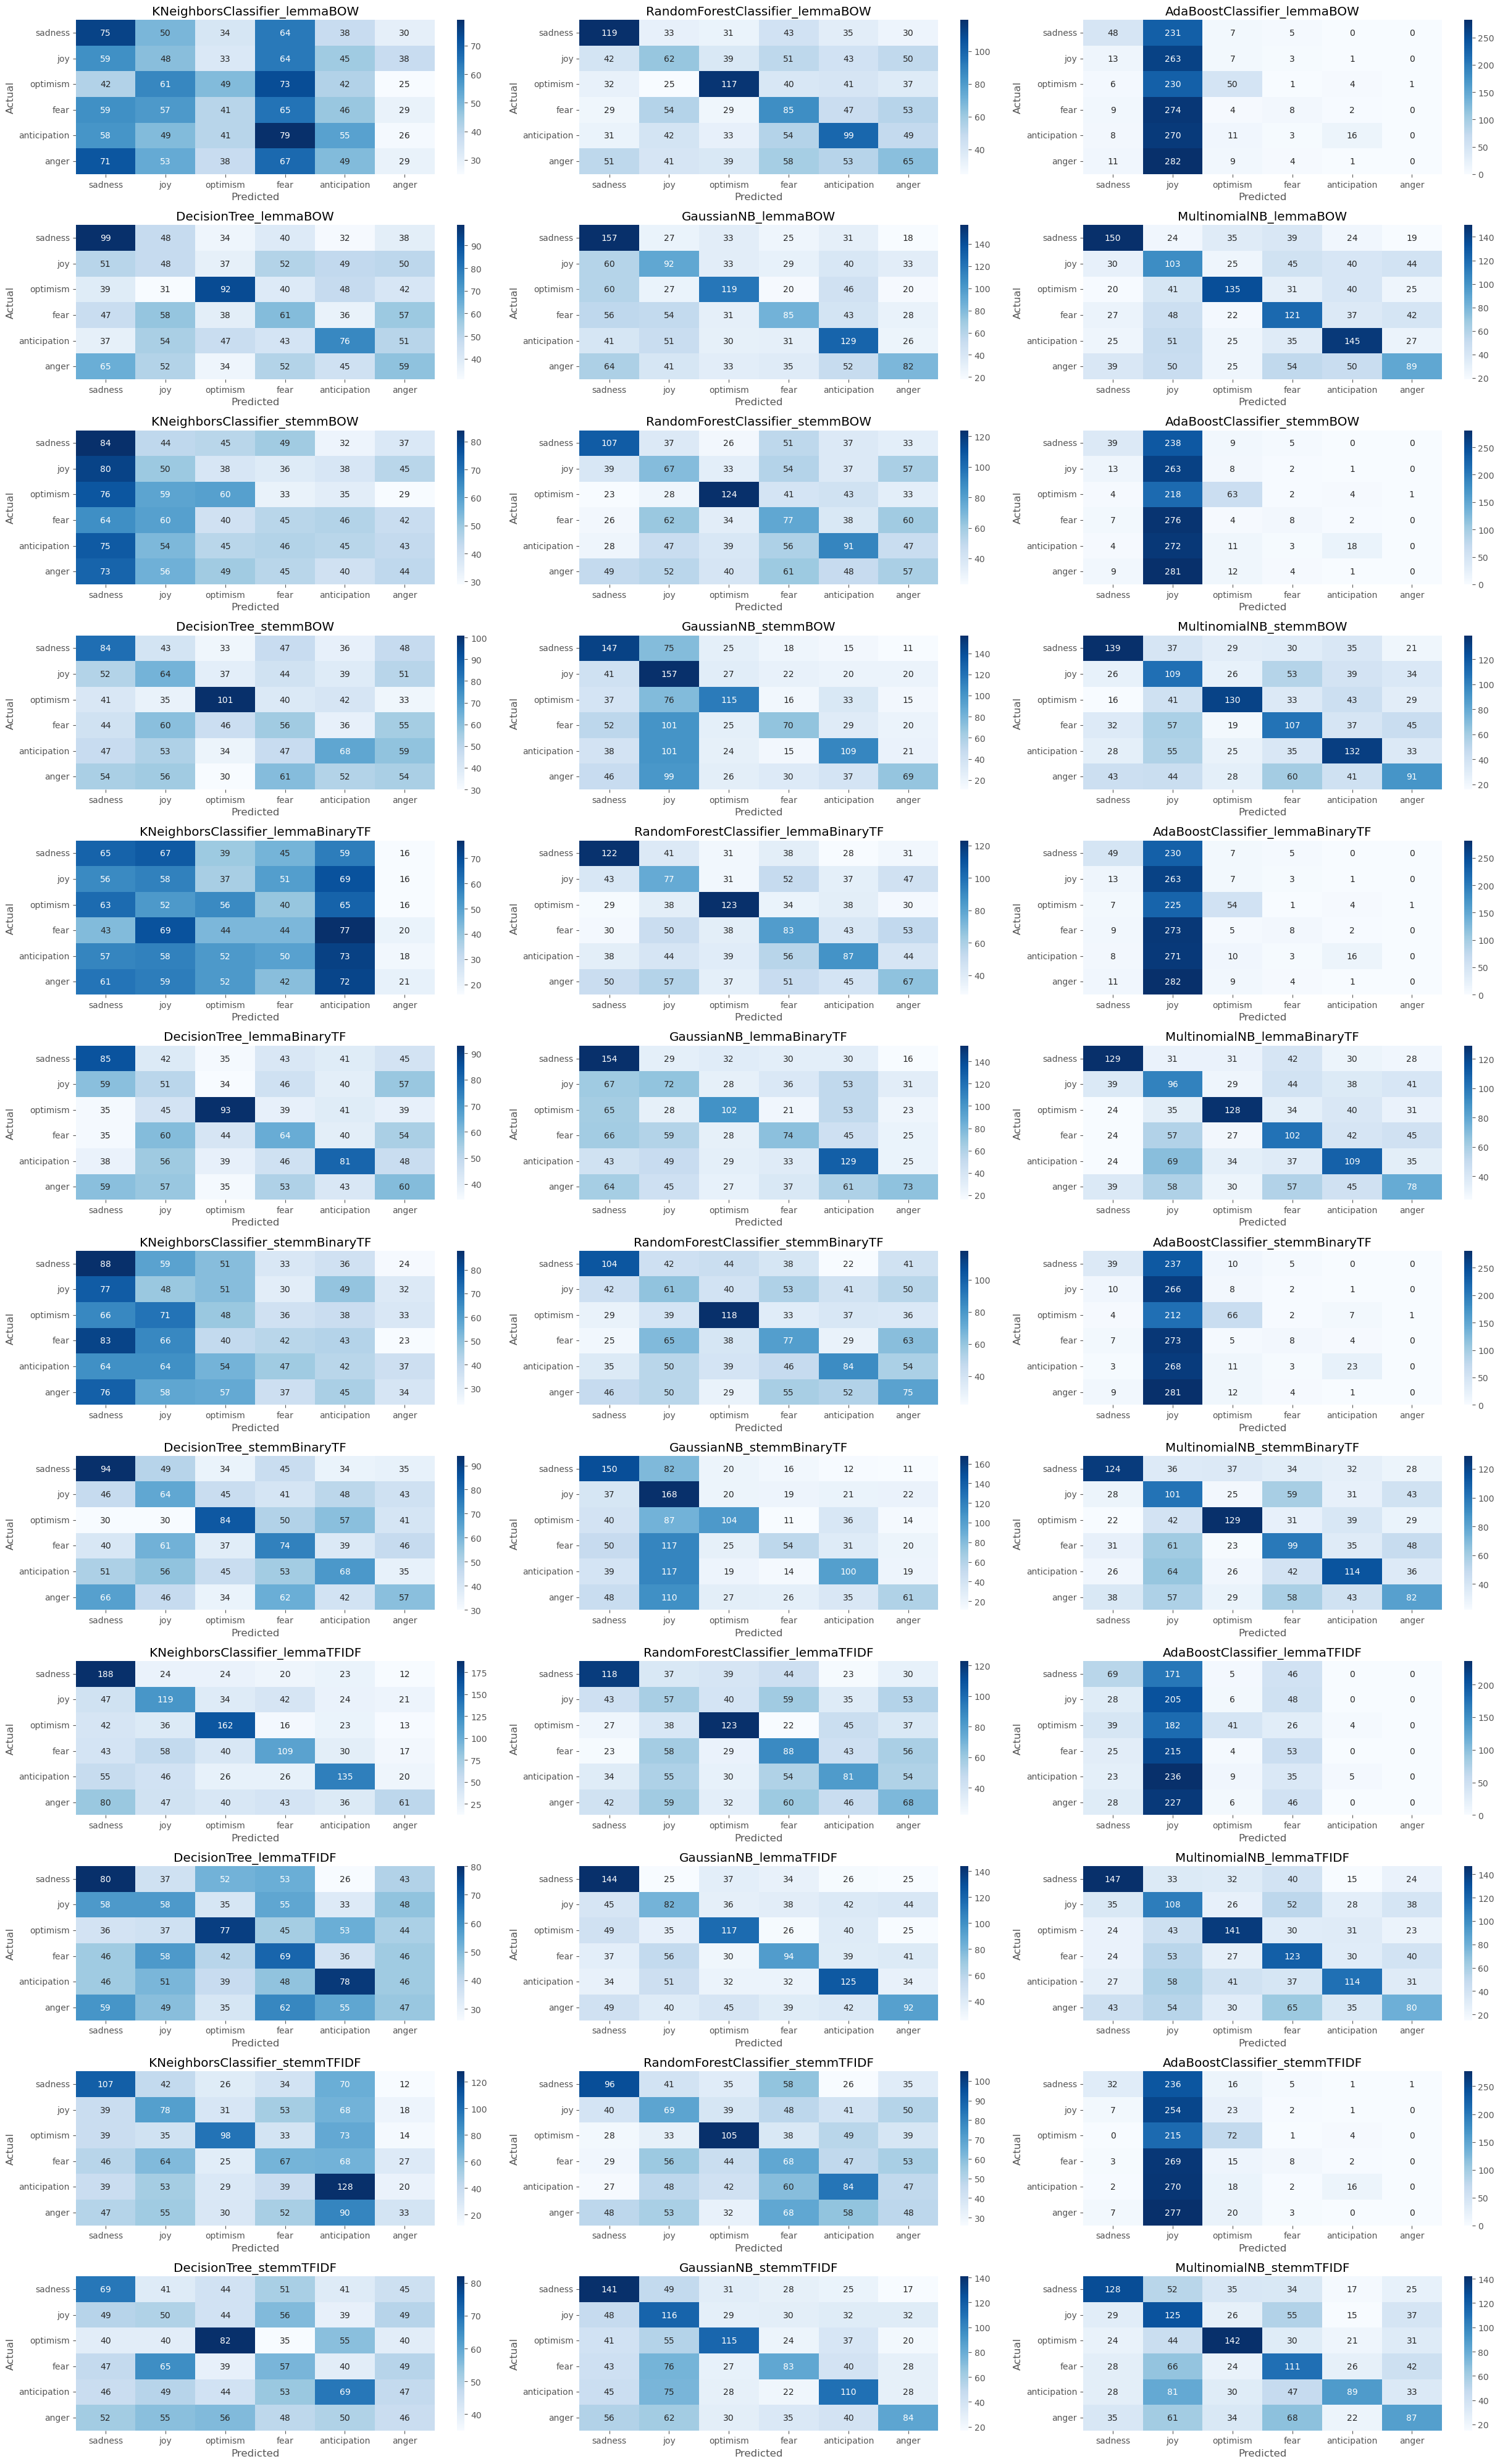

In [110]:
import seaborn as sns
# Configura la figura y los ejes para mostrar 12 filas y 3 columnas de matrices de confusión.
fig, axes = plt.subplots(ncols=3, nrows=12, figsize=(25, 40))

# Obtiene las etiquetas únicas de la columna "emotion" en tu DataFrame.
labels_confmts = sampled_df["emotion"].unique().tolist()

comb_cont = 0  # Inicializa un contador para las combinaciones

# Itera a través de las filas (0 a 11) y columnas (0 a 2) de los subgráficos.
for i in range(0, 12):
    for j in range(3):
        ax = axes[i, j]  # Accede a cada subgráfico
        conf_mt = conf_mts[comb_cont]  # Obtiene la matriz de confusión correspondiente al contador de combinaciones

        # Crea un heatmap de la matriz de confusión, con anotaciones, formato de número entero y el esquema de colores "Blues".
        sns.heatmap(conf_mt, annot=True, fmt='d', cmap='Blues', ax=ax, 
                    xticklabels=labels_confmts, yticklabels=labels_confmts)

        # Configura el título y las etiquetas de los ejes del subgráfico.
        ax.set(
            title=f"{combinaciones1[comb_cont]}",  # Título usando la combinación correspondiente
            ylabel="Actual",  # Etiqueta del eje Y
            xlabel="Predicted"  # Etiqueta del eje X
        )
        
        comb_cont += 1  # Incrementa el contador de combinaciones para la siguiente iteración

# Ajusta la disposición para que no se superpongan los elementos.
plt.tight_layout()
# Muestra la figura con las matrices de confusión.
plt.show()


### Guardando datos del modelo que mejor se comportó para tunearlo

In [111]:
#vectorizadores

In [112]:
# MODELO DE PEOR DESEMPEÑO

# Seleccionar el primer DataFrame en la lista vectorizadores
vectorizado = vectorizadores[1][1] # el de  menor performance

# Eliminar la columna 'emotion' de 'trial' para obtener X
X = vectorizado.drop(columns=["emotion"]).to_numpy()

# Asignar la columna 'emotion' a y
y = vectorizado ["emotion"].to_numpy()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = KNeighborsClassifier()

clf.fit(X_train, y_train)


clf.score(X_test, y_test)

y_preds = clf.predict(X_test) 
accuracy_score(y_test, y_preds)


0.16947250280583614

In [113]:
from sklearn.model_selection import GridSearchCV, KFold

In [114]:

# MODELO DE MEJOR DESEMPEÑO

# Seleccionar el primer DataFrame en la lista vectorizadores
vectorizado = vectorizadores[2][0] # el de  mejor performance

# Eliminar la columna 'emotion' de 'vectorizado' para obtener X
X = vectorizado.drop(columns=["emotion"]).to_numpy()

# Asignar la columna 'emotion' a y
y = vectorizado ["emotion"].to_numpy()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = KNeighborsClassifier().fit(X_train, y_train) # Modelo de clasificación que vimos que tiene mejor desempeño.

clf.score(X_test, y_test)

y_preds = clf.predict(X_test) 
accuracy_score(y_test, y_preds)

0.43434343434343436

In [117]:

# MODELO DE MEJOR DESEMPEÑO - hyperparameter tuning

# Seleccionar el primer DataFrame en la lista vectorizadores
vectorizado = vectorizadores[2][0] # el de  mejor performance

# Eliminar la columna 'emotion' de 'vectorizado' para obtener X
X = vectorizado.drop(columns=["emotion"]).to_numpy()

# Asignar la columna 'emotion' a y
y = vectorizado ["emotion"].to_numpy()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_score = {}
test_score = {}



n_neighbors = np.arange(2,  32, 1)

for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train);_
    train_score[neighbor] = knn.score(X_train, y_train)
    test_score[neighbor] =  knn.score(X_test, y_test)



In [118]:
for key, value in test_score.items():
    if value == max(test_score.values()):
        print(key);

5


In [119]:
kf = KFold(n_splits=5, shuffle=True, random_state=44)
parameter = {"n_neighbors": np.arange(2, 32, 1)}
knn = KNeighborsClassifier();
knn_cv = GridSearchCV(knn, parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'n_neighbors': 6}


In [129]:

# MODELO DE MEJOR DESEMPEÑO - hyperparameter tuning

# Seleccionar el primer DataFrame en la lista vectorizadores
vectorizado = vectorizadores[2][0] # el de  mejor performance

# Eliminar la columna 'emotion' de 'vectorizado' para obtener X
X = vectorizado.drop(columns=["emotion"]).to_numpy()

# Asignar la columna 'emotion' a y
y = vectorizado ["emotion"].to_numpy()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn  =  KNeighborsClassifier(n_neighbors=7);

knn.fit(X_train, y_train);

y_preds = knn.predict(X_test);

acc_knn = accuracy_score(y_test, y_preds)
f1_knn = f1_score(y_test, y_preds, average="weighted")
recall_knn = recall_score(y_test, y_preds, average="weighted")

In [130]:
print("Accuracy: {} \nF1 score: {} \nRecall: {}".format(acc_knn, f1_knn, recall_knn))

Accuracy: 0.42536475869809204 
F1 score: 0.4097509390366799 
Recall: 0.42536475869809204


In [122]:
cof_mt = confusion_matrix(y_test, y_preds, labels = list(vectorizado["emotion"].unique()))

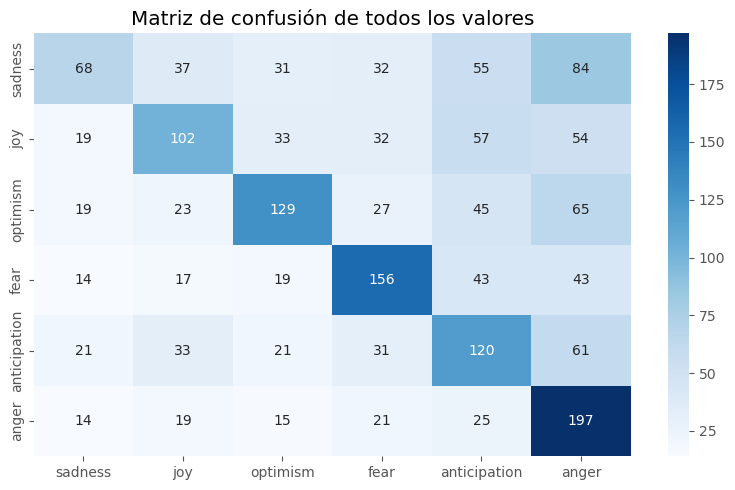

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

sns.heatmap(cof_mt, fmt='d', annot=True, cmap="Blues", xticklabels=list(vectorizado["emotion"].unique()), yticklabels=list(vectorizado["emotion"].unique()))

ax.set(
    title="Matriz de confusión de todos los valores"
)

plt.tight_layout()
plt.show()

In [124]:
f"{round(np.trace(cof_mt) / np.sum(cof_mt) * 100, 2)}%"

'43.32%'

In [161]:
import pickle


# Guardar el modelo entrenado en un archivo .pkl
with open("modelo/model.pkl", "wb") as file:
    pickle.dump(knn, file)

# Guardar el conjunto de pruebas X_test en un archivo .pkl
with open("modelo/x_test.pkl", "wb") as file:
    pickle.dump(X_test, file)

# Guardar el vectorizador entrenado
with open("modelo/best_vectorizer.pkl", "wb") as file:
    pickle.dump(best_vectorizer, file)


# Guardar comentario, para predecirlo
with open("modelo/comment.pkl", "wb") as file:
    pickle.dump(comment, file)

###  Fuentes: 
Dealing with contractions in NLP: https://medium.com/@lukei_3514/dealing-with-contractions-in-nlp-d6174300876b

El dataset fue obtenido de: https://www.kaggle.com/datasets/fahadrehman07/movie-reviews-and-emotion-dataset

In [170]:
sampled_df.loc[sampled_df["emotion"]  == "anticipation"]["reviews"][14]

'It\'s amazing to think that at the turn of the century Adam Sandler was hyped as being on the brink of mega stardom . Even more amazingly he was at one point the world\'s highest paid movie star ! No doubt his loyal fans ( All three of them ) can reconcile themselves with being first in line to see his next blockbuster performance since no one in 2005 queues to see a Sandler movie , especially if it\'s released direct to video It\'s easy to see where Sandler went wrong . BIG DADDY has Sandler play a bit of a loser just like every other movie that has " Starring Adam Sandler " in the credits or should that be " Starring Adam Sandler because Ben Stiller turned the role down " ? . Here his girlfriend dumps him and he finds out his ex wife has died and so his infant son who he\'s not seen is thrust on his doorstep , but if you\'re expecting a heart warming tale similar to THE KID you\'re going to be disappointed since it\'s " Starring Adam Sandler " so the story takes a turn for the worse